# Project 1: Generating Random Data with Specific Probability Distributions

2025, Rayhan R. Zamzamy, et al.

In this experiment, we generate and analyze random data that follows specific probability distributions using R. This includes Uniform, Bernoulli, Erlang, Exponential, Normal, and Weibull distributions. We compare the empirical data with their theoretical characteristics (mean, variance, and PDF), and evaluate goodness of fit.


## Preparation

In [1]:
# Install and load the IRdisplay package
# install.packages("IRdisplay")
# install.packages("MASS")
library(IRdisplay)
library(MASS)

In [2]:
# Set the seed for reproducibility
set.seed(52)

## 1. Uniform Distribution

We generate 1000 random values from $U(0, 1)$.


### Parameters:
- $a = 0$, $b = 1$  

### Theoretical Formulas:
- **Probability Density Function (PDF)**
  $$f(x) = \frac{1}{b-a}, \quad \text{for } x\in[a,b]$$

- **Expected Value (Mean)**:  
  $$E[X] = \frac{a + b}{2}$$

- **Variance**:  
  $$\text{Var}(X) = \frac{(b - a)^2}{12}$$

### Expected Results
- $E[X] = 0.5$, $\text{Var}(X) \approx 0.0833$


Mean: 0.4971866 
Variance: 0.08447372 



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  uniform_data
D = 0.016508, p-value = 0.9481
alternative hypothesis: two-sided


$$f(x) = \frac{1}{1-0}, \quad \text{for } x\in[0,1]$$

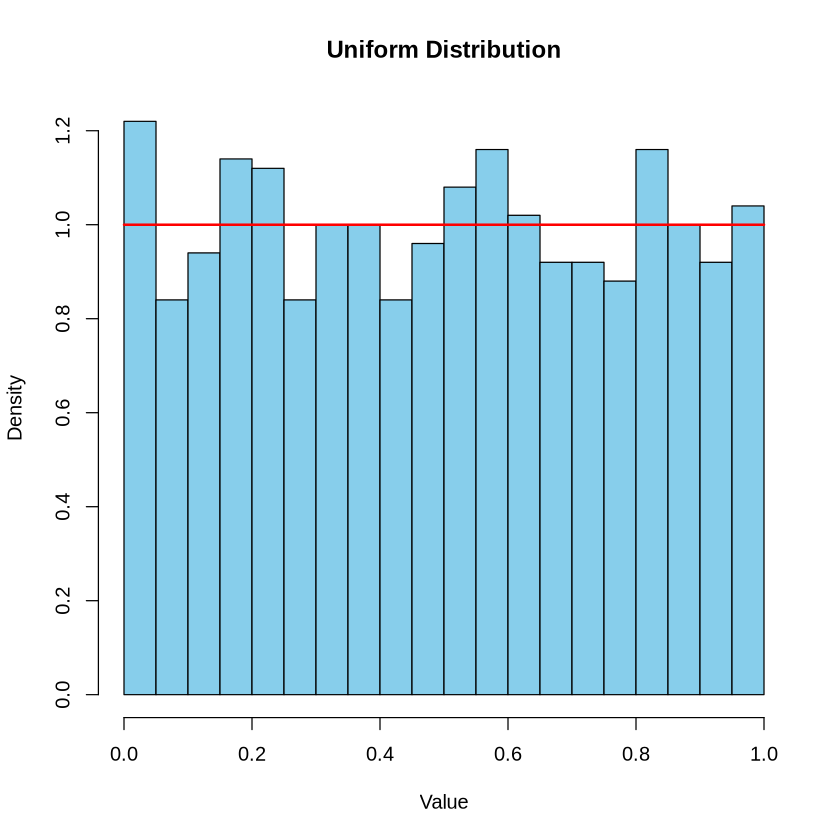

In [3]:
a <- 0
b <- 1
uniform_data <- runif(1000, min = a, max = b)

# Histogram with density curve
hist(uniform_data, probability = TRUE, breaks = 20,
     main = "Uniform Distribution", col = "skyblue", xlab = "Value")
curve(dunif(x, min = 0, max = 1), add = TRUE, col = "red", lwd = 2)

# Statistics
cat("Mean:", mean(uniform_data), "\n")
cat("Variance:", var(uniform_data), "\n")

# Goodness of fit
ks.test(uniform_data, "punif", min = a, max = b)

# Mathematical formula
display_markdown(paste0(
     "$$f(x) = \\frac{1}{", b, "-", a, "}, \\quad \\text{for } x\\in[", a, ",", b, "]$$"
))

## 2. Bernoulli Distribution

We simulate 1000 samples from a Bernoulli distribution with success probability $p = 0.3$.

### Parameters:
- $p = 0.3$ 

### Theoretical Formulas:
- **Probability Mass Function (PMF)**
  $$
  P(X=x)=\begin{cases}
    p, & \text{if } x=1 \\
    1-p, & \text{if } x=0
  \end{cases}
  $$

- **Expected Value (Mean)**:  
  $$E[X] = p$$

- **Variance**:  
  $$\text{Var}(X) = p(1 - p)$$

### Expected Results 
- $E[X] = 0.3$, $\text{Var}(X) = 0.21$


Mean: 0.299 
Variance: 0.2098088 



	Chi-squared test for given probabilities

data:  observed
X-squared = 1.8438e-29, df = 1, p-value = 1


$$P(X=x)=\begin{cases}0.299, & \text{if } x=1 \\ 1-0.299, & \text{if } x=0 \end{cases}$$

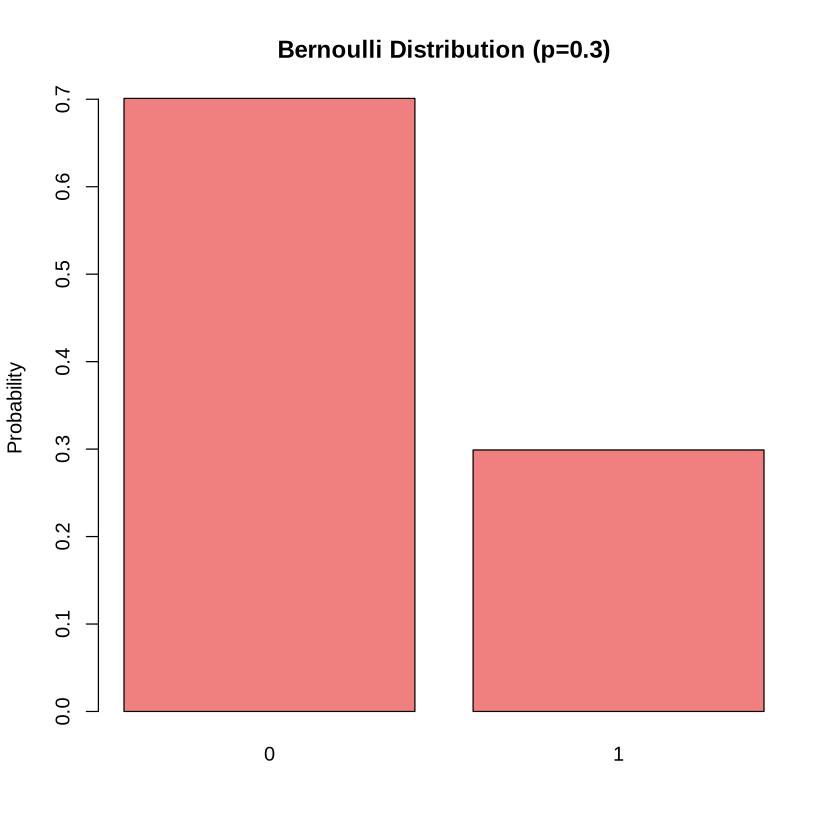

In [4]:
p <- 0.3
bernoulli_data <- rbinom(1000, size = 1, prob = p)

# Histogram with density points
barplot(table(bernoulli_data) / length(bernoulli_data),
        main = "Bernoulli Distribution (p=0.3)", col = "lightcoral",
        names.arg = c("0", "1"), ylab = "Probability")

# Statistics
cat("Mean:", mean(bernoulli_data), "\n")
cat("Variance:", var(bernoulli_data), "\n")
p_gen <- mean(bernoulli_data)

# Goodness of fit
observed <- table(bernoulli_data)
expected <- c((1 - p_gen), p_gen) * length(bernoulli_data)
chisq.test(x = observed, p = expected / sum(expected))

# Mathematical formula
display_markdown(paste0(
        "$$P(X=x)=\\begin{cases}", round(p_gen, 3), ", & \\text{if } x=1 \\\\ 1-", round(p_gen, 3), ", & \\text{if } x=0 \\end{cases}$$"
))

## 3. Erlang Distribution

We generate 1000 samples from an Erlang distribution with $k = 2$ and $\lambda = 1$.

### Parameters:
- $k = 2, \lambda = 1$

### Theoretical Formulas:
- **Probability Density Function (PDF)**
  $$f(x) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!}, \quad x \geq 0 \quad k=1,2,3,...$$

- **Expected Value (Mean)**:  
  $$E[X] = \frac{k}{\lambda}$$

- **Variance**:  
  $$\text{Var}(X) = \frac{k}{\lambda^2}$$

### Expected Results
- $E[X] = 2$, $\text{Var}(X) = 2$


Mean: 1.952711 
Variance: 1.789638 



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  erlang_data
D = 0.10962, p-value = 7.297e-11
alternative hypothesis: two-sided


$$f(x) = \frac{(0.916)^{(2.131)} x^{(2.131)-1} e^{-(0.916) x}}{((2.131)-1)!}, \quad x \geq 0 \quad k=1,2,3,...$$

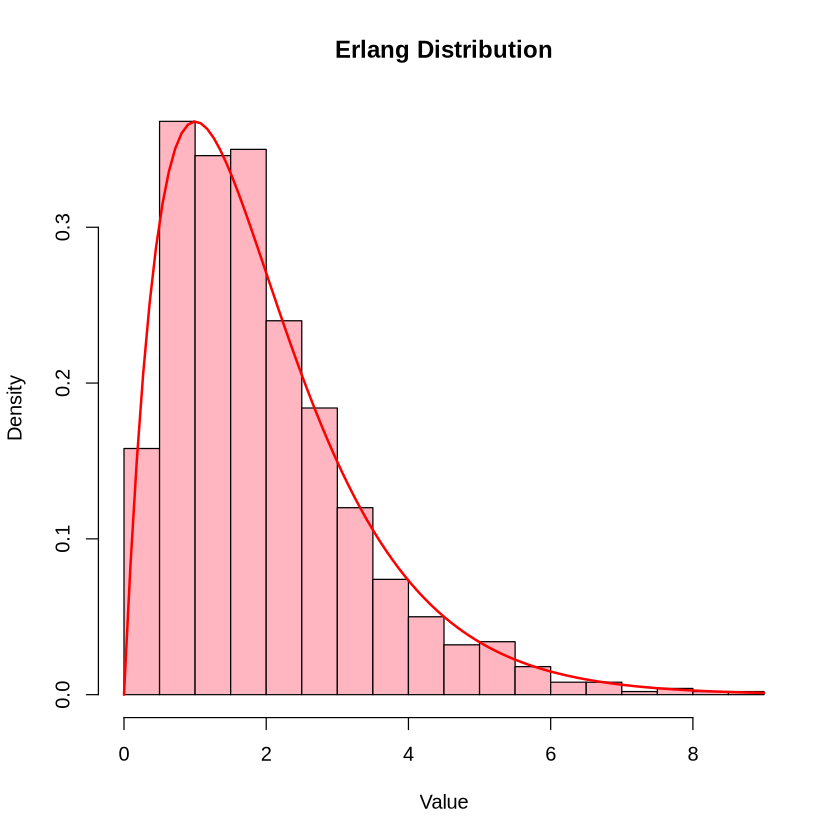

In [5]:
k <- 2
lambda <- 1
erlang_data <- rgamma(1000, shape = k, rate = lambda)

# Histogram with density curve
hist(erlang_data, probability = TRUE, breaks = 20,
     main = "Erlang Distribution", col = "lightpink", xlab = "Value")
curve(dgamma(x, shape = k, rate = lambda), add = TRUE, col = "red", lwd = 2)

# Statistics
cat("Mean:", mean(erlang_data), "\n")
cat("Variance:", var(erlang_data), "\n")
k_gen <- mean(erlang_data)^2 / var(erlang_data)
lambda_gen <- mean(erlang_data) / k_gen

# Goodness of fit
ks.test(erlang_data, "pgamma", shape = k_gen, rate = lambda_gen)

# Mathematical formula
display_markdown(paste0(
     "$$f(x) = \\frac{(", round(lambda_gen, 3), ")^{(", round(k_gen, 3), ")} x^{(", round(k_gen, 3), ")-1} e^{-(", round(lambda_gen, 3), ") x}}{((", round(k_gen, 3), ")-1)!}, \\quad x \\geq 0 \\quad k=1,2,3,...$$"
))


## 4. Exponential Distribution

We generate 1000 samples from an exponential distribution with rate $\lambda = 1$.

### Parameters:
- $\lambda = 1$  

### Theoretical Formulas:
- **Probability Density Function (PDF)**
  $$f(x)=\lambda e^{-\lambda x}, \quad x \ge 0$$

- **Expected Value (Mean)**:  
  $$E[X] = \frac{1}{\lambda}$$

- **Variance**:  
  $$\text{Var}(X) = \frac{1}{\lambda^2}$$

### Expected Results
- $E[X] = 1$, $\text{Var}(X) = 1$


Mean: 0.9828399 
Variance: 1.009686 



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  expo_data
D = 0.020136, p-value = 0.8122
alternative hypothesis: two-sided


$$f(x) = (1.017)e^{-(1.017)x}, \quad \text{for } x\geq0$$

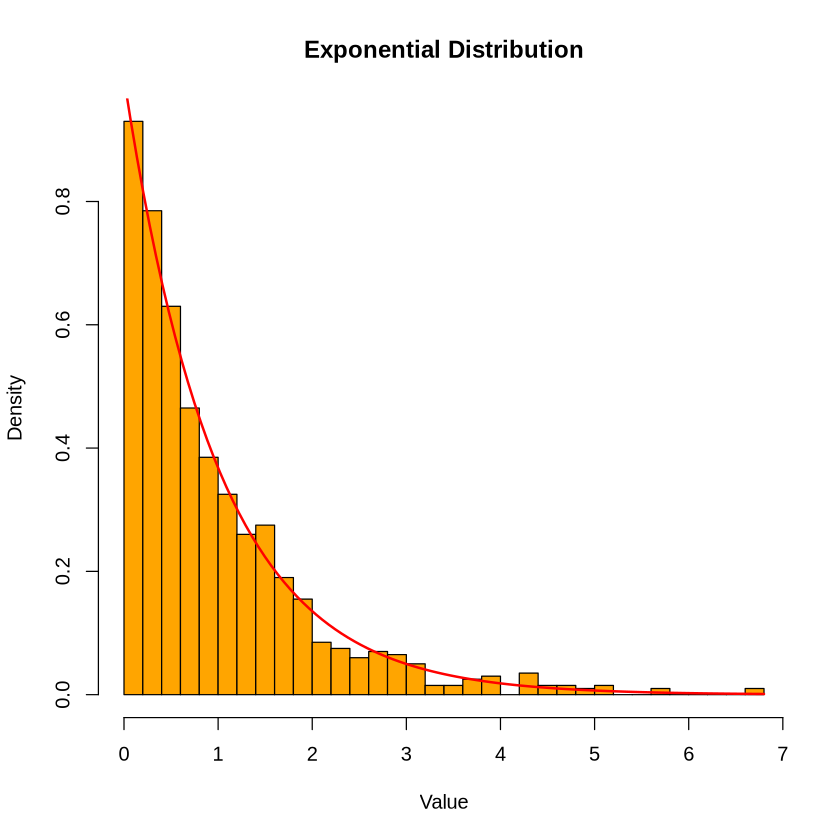

In [6]:
lambda <- 1
expo_data <- rexp(1000, rate = lambda)

# Histogram with density curve
hist(expo_data, probability = TRUE, breaks = 30,
     main = "Exponential Distribution", col = "orange", xlab = "Value")
curve(dexp(x, rate = 1), add = TRUE, col = "red", lwd = 2)

# Statistics
cat("Mean:", mean(expo_data), "\n")
cat("Variance:", var(expo_data), "\n")
lambda_gen <- 1/mean(expo_data)

# Goodness of fit
ks.test(expo_data, "pexp", rate = lambda_gen)

# Mathematical formula
display_markdown(paste0(
     "$$f(x) = (", round(lambda_gen, 3), ")e^{-(", round(lambda_gen, 3), ")x}, \\quad \\text{for } x\\geq0$$"
))

## 5. Normal Distribution

We generate 1000 samples from a normal distribution with $\mu = 0$ and $\sigma = 1$.

### Parameters:
- $\mu = 0$, $\sigma = 1$  

### Theoretical Formulas:
- **Probability Density Function (PDF)**
  $$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)$$

- **Expected Value (Mean)**:  
  $$E[X] = \mu$$

- **Variance**:  
  $$\text{Var}(X) = \sigma^2$$

### Expected Results
- $E[X] = 0$, $\text{Var}(X) = 1$


Mean: 0.01552732 
Variance: 0.9960005 



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  normal_data
D = 0.022045, p-value = 0.716
alternative hypothesis: two-sided


ERROR: Error in display_markdown(paste0("$$f(x) = \\frac{1}{\\sqrt{2\\pi(", round(sigma_gen, : could not find function "display_markdown"


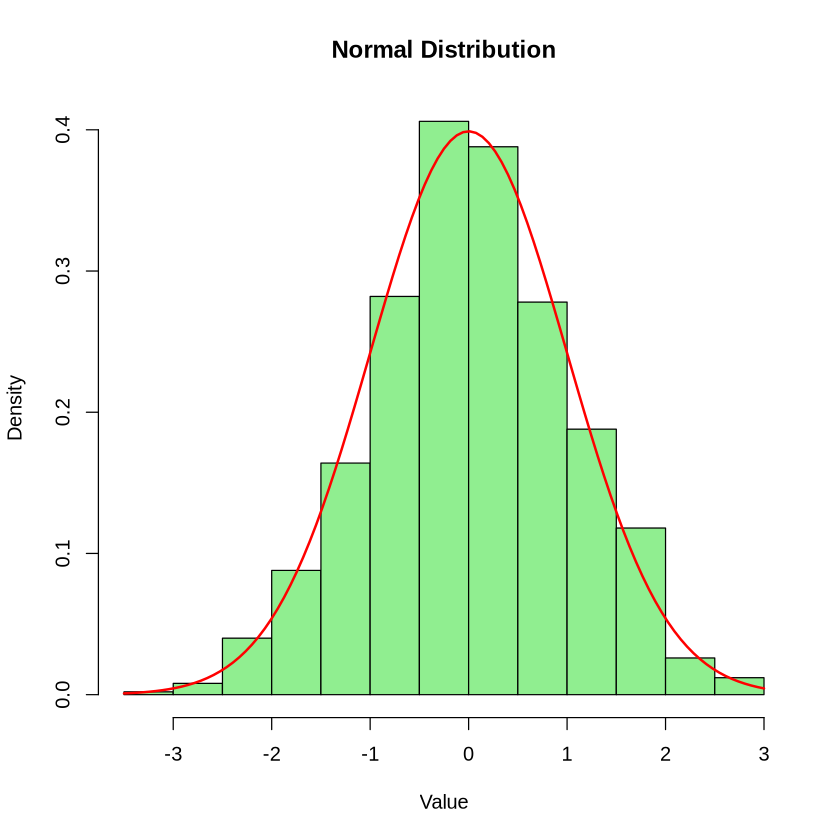

In [1]:
mu <- 0
sigma <- 1
normal_data <- rnorm(1000, mean = mu, sd = sigma)

# Histogram with density curve
hist(normal_data, probability = TRUE, breaks = 20,
     main = "Normal Distribution", col = "lightgreen", xlab = "Value")
curve(dnorm(x, mean = 0, sd = 1), add = TRUE, col = "red", lwd = 2)

# Statistics
cat("Mean:", mean(normal_data), "\n")
cat("Variance:", var(normal_data), "\n")
mu_gen <- mean(normal_data)
sigma_gen <- sd(normal_data)

# Goodness of fit
ks.test(normal_data, "pnorm", mean = mu_gen, sd = sigma_gen)

# Mathematical formula
display_markdown(paste0(
     "$$f(x) = \\frac{1}{\\sqrt{2\\pi(", round(sigma_gen, 3), ")^2}} \\cdot \\exp\\left(-\\frac{(x-(", round(mu_gen, 3), "))^2}{2(", round(sigma_gen, 3), ")^2}\\right)$$"
))

## 6. Weibull Distribution

We generate 1000 samples from a Weibull distribution with shape $k = 2$ and scale $\lambda = 1$.

### Parameters:
- $k = 2$, $\lambda = 1$

### Theoretical Formulas:
- **Probability Density Function (PDF)**
  $$f(x)= \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k}, \quad x \ge 0$$

- **Expected Value (Mean)**:  
  $$E[X] = \lambda \cdot \Gamma\left(1 + \frac{1}{k}\right)$$

- **Variance**:  
  $$\text{Var}(X) = \lambda^2 \left[\Gamma\left(1 + \frac{2}{k}\right) - \left(\Gamma\left(1 + \frac{1}{k}\right)\right)^2 \right]$$

### Expected Results  
- $E[X] \approx 0.886$, $\text{Var}(X) \approx 0.214$


Mean: 0.8926572 
Variance: 0.2189956 


Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  weibull_data
D = 0.021243, p-value = 0.7576
alternative hypothesis: two-sided


$$f(x) = \frac{(1.991)}{(1.007)} \left( \frac{x}{(1.007)} \right)^{(1.991)-1} e^{-(x/(1.007))^{(1.991)}}, \quad \text{for } x\geq0$$

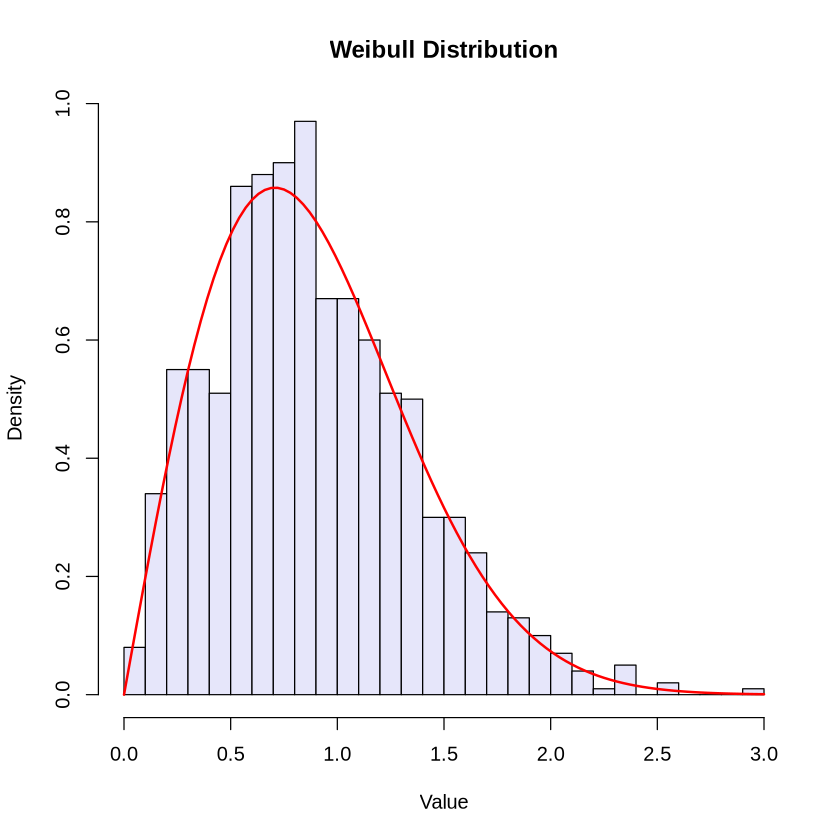

In [8]:
lambda <- 1
k <- 2
weibull_data <- rweibull(1000, shape = k, scale = lambda)

# Histogram with density curve
hist(weibull_data, probability = TRUE, breaks = 30,
     main = "Weibull Distribution", col = "lavender", xlab = "Value")
curve(dweibull(x, shape = 2, scale = 1), add = TRUE, col = "red", lwd = 2)

# Statistics
cat("Mean:", mean(weibull_data), "\n")
cat("Variance:", var(weibull_data), "\n")

# Goodness of fit
fit <- fitdistr(weibull_data, "weibull")
k_gen <- fit$estimate["shape"]
lambda_gen <- fit$estimate["scale"]

ks.test(weibull_data, "pweibull", shape = k_gen, scale = lambda_gen)

# Mathematical formula
display_markdown(paste0(
     "$$f(x) = \\frac{(", round(k_gen, 3), ")}{(", round(lambda_gen, 3), ")} \\left( \\frac{x}{(", round(lambda_gen, 3), ")} \\right)^{(", round(k_gen, 3), ")-1} e^{-(x/(", round(lambda_gen, 3), "))^{(", round(k_gen, 3), ")}}, \\quad \\text{for } x\\geq0$$"
))

## Summary

In this experiment, we generated and analyzed random data following various probability distributions: Uniform, Bernoulli, Erlang, Exponential, Normal, and Weibull. For each distribution, we:

- Generated 1,000 random samples using R.
- Calculated empirical mean and variance.
- Compared empirical results with theoretical expectations.
- Evaluated goodness-of-fit using appropriate statistical tests: Kolmogorov-Smirnov test for continuous distributions, Chi-squared test for discrete distributions.

The results demonstrated a strong alignment between the simulated data and theoretical properties, validating the correctness of the random data generation and the underlying statistical principles.